In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
!wget $data

--2025-10-20 00:12:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv.2’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.003s  

2025-10-20 00:12:34 (22.7 MB/s) - ‘course_lead_scoring.csv.2’ saved [80876/80876]



In [4]:
df = pd.read_csv('course_lead_scoring.csv')

# Getting Size
df.shape

(1462, 9)

In [5]:
#look at the head
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
# Types inspection
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [7]:
# getting categorical columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# prepare uniform values in column names (not needed but done for practice)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# preparing uniform values in column values
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

# filling NAs of categorical_columns
df[categorical_columns] = df[categorical_columns].fillna('NA')

In [8]:
# getting numerical columns
numerical_columns = ['number_of_courses_viewed','annual_income','interaction_count','lead_score']

# filling NAs of numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0.0)

numerical_columns

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [9]:
# Looking at the Transpose on the head()
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NA,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NA,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [10]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution
# Use train_test_split function for that with random_state=1
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_full_train), len(df_train), len(df_val), len(df_test)


(1169, 876, 293, 293)

In [11]:
876 + 293 +293

1462

In [12]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
462,events,manufacturing,2,95543.0,unemployed,europe,3,0.78,0
135,referral,NA,1,54924.0,student,south_america,6,0.39,1
117,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22,0
1051,paid_ads,other,2,34600.0,employed,south_america,2,0.31,0
945,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01,0
...,...,...,...,...,...,...,...,...,...
39,NA,other,5,67314.0,NA,europe,2,0.87,1
1261,events,education,6,63996.0,NA,australia,4,0.92,1
595,organic_search,finance,1,73702.0,unemployed,north_america,2,0.55,0
1329,events,technology,1,93341.0,student,middle_east,4,0.99,0


In [13]:
# Reset Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Prepare y
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

# Delete column converted
del df_train['converted']
del df_val['converted']
del df_test['converted'] 

In [14]:
# Question 1:
from sklearn.metrics import roc_auc_score

for numerical_column in numerical_columns:
    print(numerical_column + " " + str(roc_auc_score(y_train, df_train[numerical_column])))

number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176


In [15]:
# Question 2
dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# the solver on the homework description does not match any answer for exercises 2 and 3. However, following the other student with the strategy below it helped
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [16]:
val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)
 
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8532423208191127)

In [17]:
round(roc_auc_score(y_val, y_pred),3)

0.92

In [18]:
# Question 3
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [19]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
# p = tp / (tp + fp)
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
# r = tp / (tp + fn)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

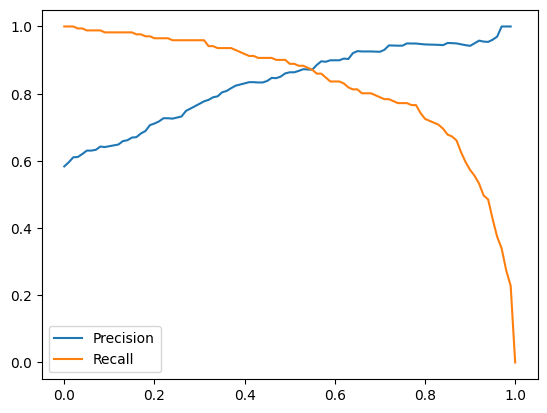

In [20]:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()

In [21]:
idx = np.argwhere(
    np.diff(
        np.sign(np.array(df_scores['precision']) - np.array(df_scores['recall']))
    )
).flatten()

In [22]:
print(f"The precision and recall curves intersect at a threshold equal to {df_scores.loc[idx]['threshold']}.")

The precision and recall curves intersect at a threshold equal to 54    0.54
55    0.55
99    0.99
Name: threshold, dtype: float64.


In [23]:
df_scores.loc[54]

threshold      0.540000
tp           150.000000
fp            22.000000
fn            21.000000
tn           100.000000
precision      0.872093
recall         0.877193
Name: 54, dtype: float64

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_scores)

     threshold   tp   fp   fn   tn  precision    recall
0         0.00  171  122    0    0   0.583618  1.000000
1         0.01  171  116    0    6   0.595819  1.000000
2         0.02  171  109    0   13   0.610714  1.000000
3         0.03  170  108    1   14   0.611511  0.994152
4         0.04  170  104    1   18   0.620438  0.994152
5         0.05  169   99    2   23   0.630597  0.988304
6         0.06  169   99    2   23   0.630597  0.988304
7         0.07  169   98    2   24   0.632959  0.988304
8         0.08  169   94    2   28   0.642586  0.988304
9         0.09  168   94    3   28   0.641221  0.982456
10        0.10  168   93    3   29   0.643678  0.982456
11        0.11  168   92    3   30   0.646154  0.982456
12        0.12  168   91    3   31   0.648649  0.982456
13        0.13  168   87    3   35   0.658824  0.982456
14        0.14  168   86    3   36   0.661417  0.982456
15        0.15  168   83    3   39   0.669323  0.982456
16        0.16  167   82    4   40   0.670683  0

In [25]:
# Question 4
df_scores['f1'] = 2 * ((df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_scores)

     threshold   tp   fp   fn   tn  precision    recall        f1
0         0.00  171  122    0    0   0.583618  1.000000  0.737069
1         0.01  171  116    0    6   0.595819  1.000000  0.746725
2         0.02  171  109    0   13   0.610714  1.000000  0.758315
3         0.03  170  108    1   14   0.611511  0.994152  0.757238
4         0.04  170  104    1   18   0.620438  0.994152  0.764045
5         0.05  169   99    2   23   0.630597  0.988304  0.769932
6         0.06  169   99    2   23   0.630597  0.988304  0.769932
7         0.07  169   98    2   24   0.632959  0.988304  0.771689
8         0.08  169   94    2   28   0.642586  0.988304  0.778802
9         0.09  168   94    3   28   0.641221  0.982456  0.775982
10        0.10  168   93    3   29   0.643678  0.982456  0.777778
11        0.11  168   92    3   30   0.646154  0.982456  0.779582
12        0.12  168   91    3   31   0.648649  0.982456  0.781395
13        0.13  168   87    3   35   0.658824  0.982456  0.788732
14        

In [26]:
"0.14 - " + str(df_scores.loc[14].f1), "0.34 - " + str(df_scores.loc[34].f1), "0.54 - " + str(df_scores.loc[54].f1), "0.74 - " + str(df_scores.loc[74].f1), 

('0.14 - 0.7905882352941176',
 '0.34 - 0.8579088471849865',
 '0.54 - 0.8746355685131195',
 '0.74 - 0.8488745980707395')

In [54]:
# Question 5
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [55]:
def predict(df, dv, model):
    dicts = df[categorical_columns + numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [56]:
!pip install tqdm

In [57]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

In [58]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
print('C=%s %.3f +- %.3f' % (1.0, np.mean(scores), np.std(scores)))

C=1.0 0.822 +- 0.036


In [59]:
scores

[0.8060745924216483,
 0.8713738368910783,
 0.7754320118852139,
 0.8018368617683685,
 0.8558272713202291]

In [60]:
np.std(scores)

np.float64(0.03580711942905165)

In [62]:
# Question 6


for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036
